XML Model Development
=========================

In order to perform a maximum likelihood analysis of gamma-ray data, you will need to construct a model containing the components that the fitter will try to match to your data. These components are contained in an XML (Extendable Markup Language) model file, which is one of the input parameters for gtlike.

Ask yourself: "What do I expect to be contributing to the gamma-ray emission I am analyzing?"


You need to include:
----------

* Astrophysical gamma-ray sources
    * AGN, pulsars, SNRs, binaries, novae, GRBs, sun, moon, etc.

* Astrophysical backgrounds
    * Galactic diffuse emission, Earth limb emission, unresolved extragalactic sources

* Irreducible backgrounds
    * Isotropic and mainly instrumental

Model Components
=====================

Your XML model file will contain a "source" entry for every component you believe contributes to the gamma-ray flux in your region of interest.

How do you find the information you need for each entry?

Point sources
-----------------

**Need:** position information and an initial guess for the spectral shape. 

Can generate position information from various catalogs (gamma-ray or otherwise). 

Spectral information available in the LAT catalogs, and in numerous papers.


Source Catalogs
-------------------------
Here's a summary of what is currently available:

* Overall Point Source Catalogs
    * [Bright Source List](http://heasarc.gsfc.nasa.gov/W3Browse/fermi/fermilbsl.htmls) - 205 sources significant above the 10-sigma level in the first 3 months in the 100 MeV -100 GeV band.
    * [First Catalog / 1FGL](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/1yr_catalog/) - 1451 sources significant above TS=25 in the first 11 months in the 100 MeV -100 GeV band.
    * [Second Catalog / 2FGL](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/2yr_catalog/) - 1871 sources significant above TS=25 in the first 24 months in the 100 MeV -100 GeV band.
    * [Third Catalog / 3FGL](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/) - 3033 sources significant above TS=25 in the first 48 months in the 100 MeV -100 GeV band.
    * [First High-Energy Catalog / 1FHL](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/1FHL/) - 514 sources detected above 10 GeV, with TS=25 in 3 years of data.
    
* Pulsars
    * [First LAT Pulsar Catalog / 1PC](http://adsabs.harvard.edu/abs/2010ApJS..187..460A) - 46 gamma-ray pulsars with significant pulsations detected in the first 6 months.
    * [Second LAT PUlsar Catalog / 2PC](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/2nd_PSR_catalog/) - 117 gamma-ray pulsars detected using 3.5 years of LAT data.
    * [Up-to-date list of gamma-ray pulsars](https://confluence.slac.stanford.edu/display/GLAMCOG/Public+List+of+LAT-Detected+Gamma-Ray+Pulsars) - The LAT team maintains this list between catalog releases.
    
* Active Galactic Nuclei
    * [First Catalog of Fermi AGN / 1LAC](http://adsabs.harvard.edu/abs/2010ApJ...715..429A) - AGN associations that correspond to sources in the 1FGL catalog.
    * [Second Catalog of LAT AGN / 2LAC](http://heasarc.gsfc.nasa.gov/W3Browse/fermi/fermilac.html) - AGN associations that correspond to sources in the 2FGL catalog.
    * [Third Catalog of LAT AGN / 3LAC](http://arxiv.org/abs/1501.06054) - AGN associations that correspond to sources in the 3FGL catalog.
    
* Gamma-ray Bursts
    * [First Catalog of LAT GRBs](http://heasarc.gsfc.nasa.gov/W3Browse/fermi/fermilgrb.html) - LAT-detected GRB from the first 3 years of operation.
    * [Second GBM Burst Catalog](http://heasarc.gsfc.nasa.gov/W3Browse/fermi/fermigbrst.html) - GRBs detected by the GBM in the first four years of the mission.

You can access most of these from the [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[Data Access](http://fermi.gsfc.nasa.gov/ssc/data/access/)

In [39]:
from IPython.display import Image,HTML

In [40]:
HTML("<iframe src='http://fermi.gsfc.nasa.gov/ssc/data/access/' width='850' height='500'></iframe>")

"My source isn't in the catalog!"
--------------

**No Problem:** Use a model from another source of the same source class. (E.g. Use a pulsar-like spectrum if looking for a pulsar.)

BUT

It's usually better to start with a very simple model (power-law) just to see if a source is there.

If your ROI contains a moving point source (sun/moon), you will need to include a spatial template for that component.

Extended or Diffuse sources
-----------------

**Need:** spatial template, and an initial guess for the spectral shape. 

Templates are available from the LAT team for extended sources in the LAT catalog. Can also generate templates by using image contours from other wavebands. 

All-sky diffuse sources also require templates and spectral information (either a model, or a counts cube). The most common of these is the Insterstellar Emission Model (aka. Galactic diffuse model), which is an all-sky spatial cube (spectral information is folded into the spatial map). 

Galactic Diffuse Model
---------

In [41]:
import pyfits
gal_diffmodel = pyfits.open('/home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/fermi/galdiffuse/gll_iem_v05_rev1.fit')
gal_diffmodel.info()

Filename: /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/fermi/galdiffuse/gll_iem_v05_rev1.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      35   (2880, 1441, 30)   float32   
1    ENERGIES    BinTableHDU     11   30R x 1C     [D]   


In [42]:
energies = gal_diffmodel[1].data
print energies

[(58.473133087158203) (79.970359802246094) (109.37089538574219)
 (149.580322265625) (204.57246398925781) (279.78207397460938)
 (382.6419677734375) (523.31756591796875) (715.7115478515625)
 (978.83782958984375) (1338.7005615234375) (1830.8642578125)
 (2503.968505859375) (3424.53466796875) (4683.54052734375)
 (6405.41064453125) (8760.314453125) (11980.9814453125) (16385.703125)
 (22409.791015625) (30648.591796875) (41916.328125) (57326.56640625)
 (78402.2734375) (107226.3125) (146647.296875) (200561.125) (274296.0)
 (375138.96875) (513056.15625)]


In [43]:
%pylab inline
plane = gal_diffmodel[0].data
import time
from IPython.display import display,clear_output

Populating the interactive namespace from numpy and matplotlib


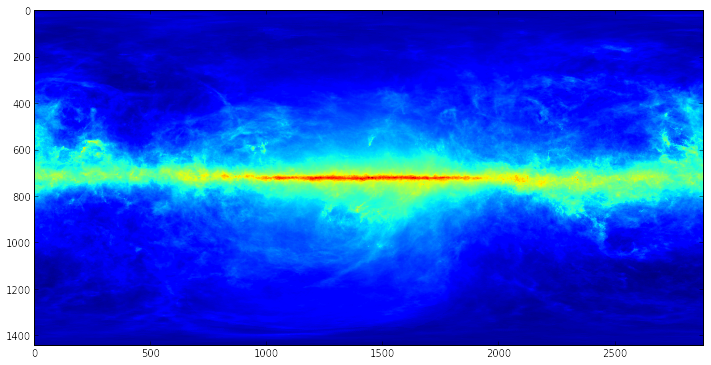

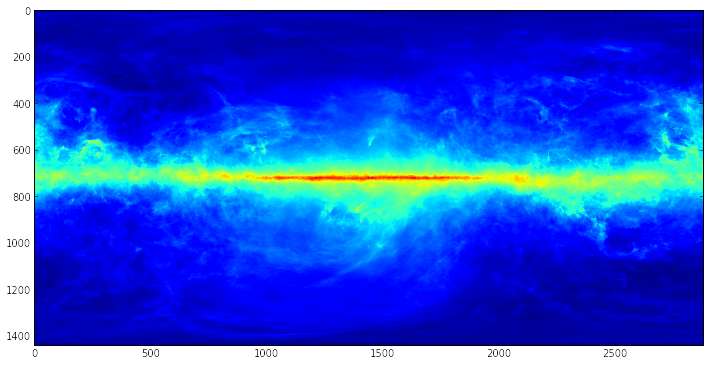

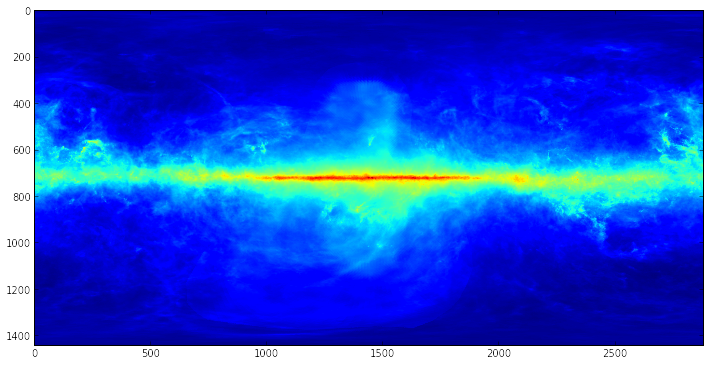

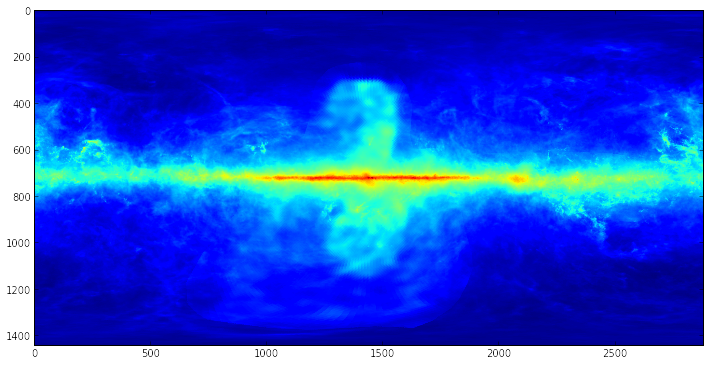

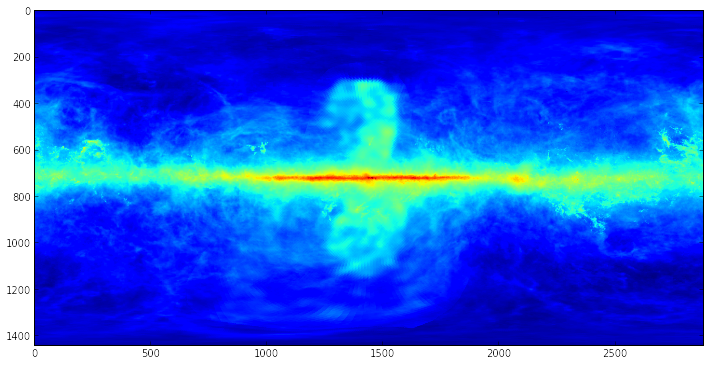

In [88]:
for i in numpy.arange(5) : 
    figure(i,figsize=[18,6])
    imshow(numpy.log10(plane[i*6+4,:,:]))

Python has indexed the images from the upper left corner, causing the image to be north-south inverted. 

Even so, it's easy to see the large structures known as the Fermi bubbles pop out in the higher-energy planes. 

Each image is scaled so that the maximum is always the same brightness. This does not convey how the Galactic diffuse component becomes less and less prominent at higher energies. 
* To see this, take a look at the model using fv.

In [47]:
%system fv /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/fermi/galdiffuse/gll_iem_v05_rev1.fit

[]

Backgrounds
-----------------
**residual background, unresolved background sources, contamination from Earth emission**
    
**Need:** Spectral form, maybe spatial template

In the sky frame, residual instrumental background and unresolved sources are both essentially isotropic. 

Given a small enough region of interest (ROI) and a tight enough zenith angle cut, the Earth limb contribution is also isotropic, and can be ignored. 

The isotropic model assumes a uniform spatial distribution, and uses a text file for the spectral form.

For Pass 7 all-sky analyses, the Earth limb should be included as a diffuse template.


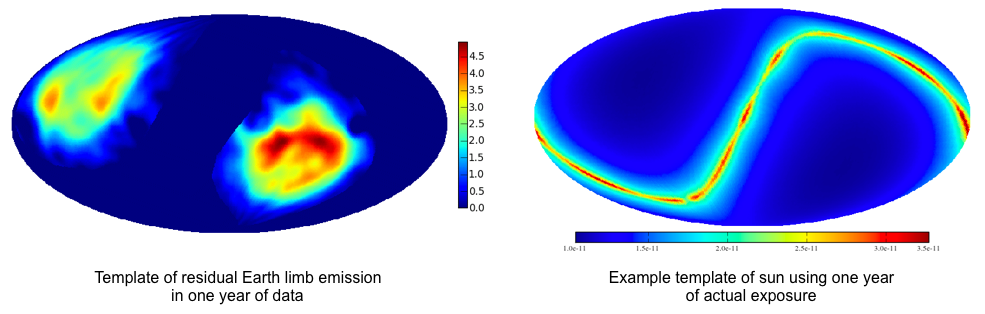

In [3]:
Image(filename='images/other_bkgs.png')

Accessing the Diffuse and Background Models
---------------------------

The isotropic and Galactic diffuse background models can be accessed from the [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[Data Access](http://fermi.gsfc.nasa.gov/ssc/data/access/)&rarr;[LAT Background Models](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/BackgroundModels.html) page:

In [48]:
HTML("<iframe src='http://fermi.gsfc.nasa.gov/ssc/data/access/lat/BackgroundModels.html' width='850' height='500'></iframe>")

In [53]:
%system cat  /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/fermi/galdiffuse/iso_source_v05.txt

['56.2289 7.30895e-07 1.30583e-09',
 '71.1114 4.24266e-07 4.7121e-10',
 '89.9329 2.44466e-07 2.79758e-10',
 '113.736 1.41763e-07 1.64058e-10',
 '143.839 8.21758e-08 1.00672e-10',
 '181.91 4.87323e-08 6.11292e-11',
 '230.058 2.98962e-08 4.2208e-11',
 '290.949 1.72277e-08 2.5629e-11',
 '367.956 9.4382e-09 1.77896e-11',
 '465.346 5.07763e-09 1.04103e-11',
 '588.512 2.67238e-09 7.59147e-12',
 '744.277 1.36168e-09 4.29333e-12',
 '941.27 6.55161e-10 3.0057e-12',
 '1190.4 3.57951e-10 1.75506e-12',
 '1505.47 2.19657e-10 1.33387e-12',
 '1903.94 1.29329e-10 8.22123e-13',
 '2407.87 7.46693e-11 5.57991e-13',
 '3045.17 4.77307e-11 3.66569e-13',
 '3851.16 3.02226e-11 2.50417e-13',
 '4870.47 2.06202e-11 1.73058e-13',
 '6159.57 1.4236e-11 1.23309e-13',
 '7789.86 9.4042e-12 8.29352e-14',
 '9851.66 6.01972e-12 5.87246e-14',
 '12459.2 3.71736e-12 3.77277e-14',
 '15756.8 2.21144e-12 2.69308e-14',
 '19927.3 1.26828e-12 1.63845e-14',
 '25201.6 6.9493e-13 1.14254e-14',
 '31871.8 3.92037e-13 6.80312e-15',
 '4

XML Structure
=====================

Now that we've looked at the components of your analysis, let's look at how the XML model is structured.

XML is a markup language (like HTML). It always uses the same basic format:

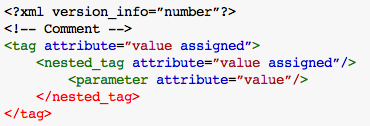

In [92]:
Image(filename='images/xml_generic.png')

**NOTES FOR XML TAGS AND ATTRIBUTES**
* Start tags ( < ) must have end tags ( /> )
* Parameter tags usually start and end on the same line
* Values for attributes are in double quotes ( “  “ ) 
* NO SPACES within an attribute definition
* If you can avoid touching the XML model, that’s best! *It’s EASY to make a typo that ruins your week.*
    
Each source in your model will have its own entry describing the source, spectral information, and spatial information, as well as some optional attributes you can apply to the source.


Here is an entry for a single source in a LAT XML model:

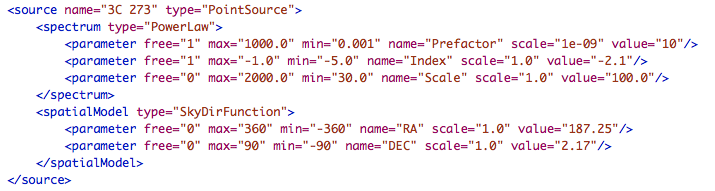

In [93]:
Image(filename='images/model1_xml.png')

Let's look at each field in more detail...



Source Attributes - 1
-----------------

* **source**
    * **name** (user-defined) - Source names cannot be duplicated
    * **type** - Two available source types
        * **PointSource** - used for any source that can be described within a small region. It may seem counter-intuitive, but an extended source that is not an all-sky source, will be considered to be a PointSource type. 
        * **DiffuseSource** - used for all-sky diffuse components; isotropic, Galactic, Earth limb and sun/moon templates.
        * The output values for the two source types have different units (the DiffuseSource has a factor in steradians. Remember to take that into consideration when looking at output values.   

Source Attributes - 2
-----------------

* **spectrum**
    * Each spectral model uses a different functional fom. A list of the functional forms for the various spectral models is available at the [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[Data Analysis](http://fermi.gsfc.nasa.gov/ssc/data/analysis/)&rarr;[Analysis Threads](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/)&rarr;[Spectral and Spatial Model Descriptions](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/source_models.html)
    * Each spectral model also has a corresponding [Example XML model](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/xml_model_defs.html) available.
    * The parameters included for each model are determined by the variables in the functional form.
    * Two of the spectral models (**PowerLaw2** and **BrokenPowerLaw2**) produce an integral flux value as the default output.
    * The **FileFunction** model allows you to define a custom spectral form within a text file. The isotropic diffuse component is an example.

Source Attributes - 3
-----------------

* **spatialModel**
    * **SkyDirFunction** - used for point sources. Takes RA and Dec as parameters.
    * **SpatialMap** - used for extended sources that use simple spectral forms, like the Earth limb template and most compact extended sources. Takes a FITS image with position information encoded into the FITS header.
    * **ConstantValue** - Used for all-sky isotropic components with no spatial structure.
    * **MapCubeFunction** - Used for spectrally complex extended sources, like the all-sky Galactic diffuse model.

Source Attributes - 4
-----------------

* Other attributes
    * **map_based_integral** - Used in the spatialModel tag. Set to *true* for extended sources. Default is *false*.
    * **parameter** - Variables used in the likelihood fit. Parameters can have the following attributes:
        * value — the parameter's value; may be an initial guess or the result of a fit
        * scale — a scale factor for the parameter's value. Ususally a multiple of 10.
        * name — name given to the parameter
        * max — parameter's maximum value (assuming the scale factor)
        * min — parameter's minimum value (assuming the scale factor)
        * free — whether the parameter should be fit: 0 means the parameter value should be fixed (frozen), 1 that it should be fit (thawed)

Let's take a look at some of the spectral forms available for use in the XML model.

In [49]:
HTML("<iframe src='http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/source_models.html' width='850' height='500'></iframe>")

Extended Sources
----------------

Sources that cannot be modeled well as point sources. 

* Evident event as early as the 1FGL catalog when the LMC region was found to consist of five individual point sources. 

* Now 25 sources that are clearly extended in LAT catalog analysis. 

* Archive with templates and sample XML models has been made available by the LAT team. 
    * Download and extract the most recent of these from the [3FGL Catalog](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/) page (Extended Sources Archive).
    * I usually put mine in the 'refdata' directory in the Science Tools


Extended sources archive
-----------

Let's take a look at the contents....

**The archive contains:**

* An overview FITS file (LAT_extended_sources_v12.fits)
    * Information about each source that had been detected as an extended source in the LAT catalog analysis at the time the 3FGL catalog was published. 
* Directories containing: 
    * XML model files
    * Spatial template FITS files

We can take a look at several of these template files in [ds9](http://ds9.si.edu/site/Download.html). This tool is not currently on the VM, but is very easy to install.

\> cd ...path_to_archive.../Extended_archive_v12/Templates/

\> ds9 -tile IC443.fits -log -cmap b -zoom 1.7 W44.fits -log -cmap b -zoom 1.7 CygnusLoop.fits -log -cmap b -zoom 0.8 LMC.fits -log -cmap b -zoom 0.3 CenALobes.fits -log -cmap b -zoom 3 S147.fits -log -cmap b

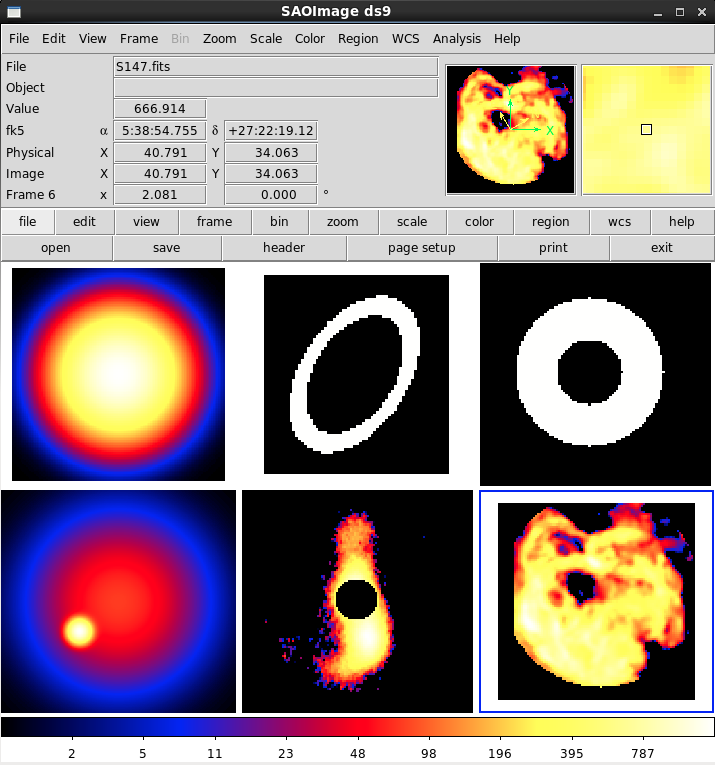

In [97]:
Image(filename='images/extended_templates.png')

Which template should I use?
----------

As with spectral models, we recommend using simple templates (disks, rings, 2D gaussians).

**However** some sources are better fit using templates from other wavebands. (Example: CenA)

XML for an extended source
---------

To include an extended source in your XML model, the code looks like this:

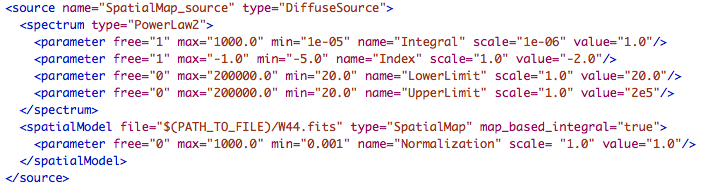

In [98]:
Image(filename='images/xml_extended.png')

You can use any spectral model with the template -  assuming the morphology of the emission does not change with energy. 

**That's an assumption.** May not be true.

If you want the size/shape of the emission to change in different energy bands, you will need to define a map cube. (Example: Interstellar emission model)

All-Sky Diffuse Sources
---------------------

The expected diffuse emission per unit livetime is calculated on an event-by-event basis when performing an unbinned likelihood fit. 

**This is computationally-intensive** 

For Pass 7 reprocessed, Galactic and isotropic diffuse responses have been precalculated by the LAT team for SOURCE and CLEAN classes. 

* *[gtlike](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtlike.txt)* checks the FITS header information to see what diffuse responses have been pre-calculated.

* If they are not present, *[gtlike](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtlike.txt)* will run the *[gtdiffrsp](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtdiffrsp.txt)* process **every time you run the tool**.

* To find out what's been precalculated, look at the header of your events file.

In [52]:
filtered_data = pyfits.open('/home/fermiuser/shared/Likelihood_data/3C279_mktime.fits')
[filtered_data[1].header['DIFRSP0'], filtered_data[1].header['DIFRSP1'], filtered_data[1].header['DIFRSP2'], filtered_data[1].header['DIFRSP3']]

['p7rep_source_v15__gll_iem_v05_rev1',
 'p7rep_source_v15__iso_source_v05',
 'p7rep_clean_v15__gll_iem_v05_rev1',
 'p7rep_clean_v15__iso_clean_v05']

This shows that the diffuse response has been precalculated for analyses using the:

* p7rep_source_v15 and p7rep_clean_v15 IRFs with 
* gll_iem_v05_rev1 version of the Galactic diffuse model, and
* iso_source_v05 and iso_clean_v05 versions of the isotropic diffuse model 


In order to tell *[gtlike](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtlike.txt)* that the diffuse response has been precalculated, we must use the following designators in generating the XML model file:
* Galactic diffuse = gll_iem_v05_rev1
* Isotropic diffuse = iso_source_v05 (or iso_clean_v05, but we are analyzing source class data)

The resulting XML should look like this:

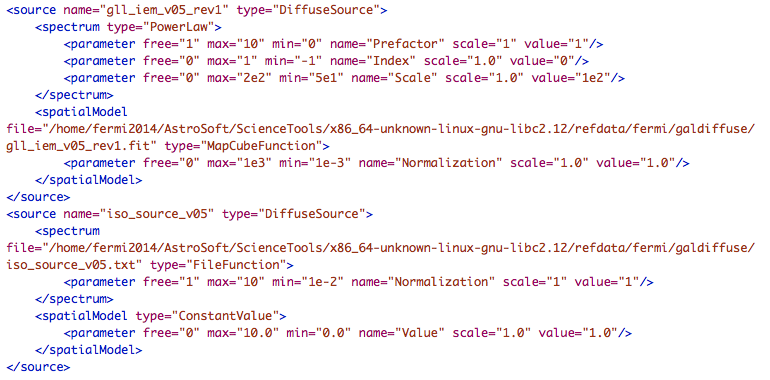

In [55]:
Image(filename='images/xml_diffuse.png')

Residual Earth Limb Template
-------------------

The Earth Limb template was created expressly for use in the 2FGL catalog analysis to account for residual emission seen in the all-sky results. Used also for 3FGL.

* Most analyses do not require an Earth Limb component (usually subsumed into the isotropic component)
* All-sky (or very-wide-field) analyses do - structure of the component becomes significant across the field
* Tighter zenith cut (e.g. 90 degrees, rather than 100) is the recommended method of reducing residual limb emission

Structure of Earth limb emission depends on the observing history of the observatory during the time period covered by the data. Earth Limb template provided by the catalog analysis is appropriate only for catalog duration and data cuts.

Earth limb template available from the [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[Data Access](http://fermi.gsfc.nasa.gov/ssc/data/access/)&rarr;[LAT 4-year Point Source Catalog](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/) page. 

Download both the spatial and spectral template files and place them in the same refdata directory.

In [57]:
HTML("<iframe src='http://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/' width='850' height='500'></iframe>")

To add the Earth limb template to your XML file you can manually edit the file. Your model should look like this:

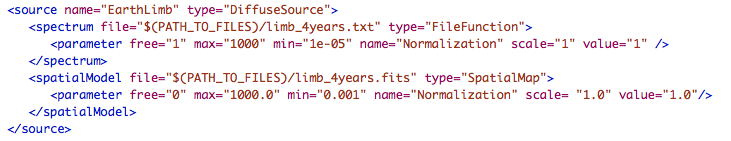

In [61]:
Image(filename='images/xml_limb.png')

Potential Pitfalls
------------------

As with everything else associate with likelihood analysis, the values in your XML file are often interrelated. Here I've highlighted some of the parameters that may cause you grief if you're not used to looking at them, or if you've stared so long you can no longer see straight:


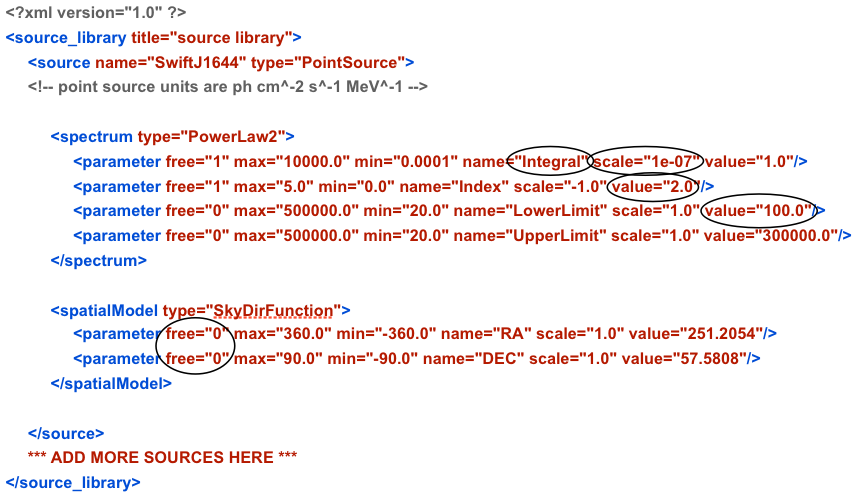

In [104]:
Image(filename='images/xml_pitfalls.png')

**NOTES FOR PARAMETER VALUES**

* If you try to set a value outside the min-max range, you will get an error
* If you don’t set scale so that value is a reasonable size, the optimizer may not converge (not true for fixed parameters)
* If you try to integrate over an energy range that has no data, your fit will fail
* If you try to fit a source that lies outside your ROI, your fit will fail 
* You should not try to fit position during a likelihood fit. There are other, more appropriate tools for that task.

Constructing an XML model
=========================

There are several methods of generating an XML model. You can:

* Build one from scratch (1871 sources in 2 years!)
* Use the *modeleditor* tool in the Fermi Science Tools
* Use a script and some basic assumptions
* Ask a friend for theirs and tweak it!

ModelEditor
------------

The ModelEditor is a GUI that allows you to add various sources, one at a time, to an XML model. You can freeze and thaw various parameters, change spectral models, etc...

You can start the ModelEditor in the terminal window by typing:

\> modeleditor

In [105]:
%system modeleditor

[]

The ModelEditor window provides drop-down menus for the available spectral and spatial models, with the appropriate parameter sets preloaded for you. It also provides different templates for point sources (also used for small extended sources) and large-scale or all-sky diffuse sources. 

Here I have entered reasonable values for our source of interest, 3C 279. Note that the position paratemers and the Scale parameter are not left free.

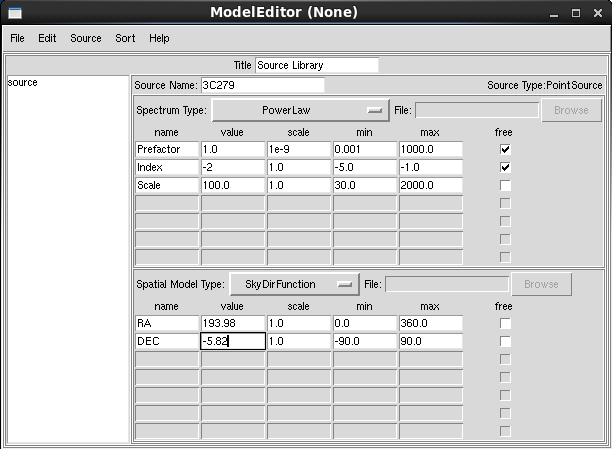

In [106]:
Image(filename='images/modeleditor_1.png')

The *Source* menu allows you to easily add and remove sources. You can also import sources within your ROI from the LAT catalogs, with the option to filter out low-significance sources.

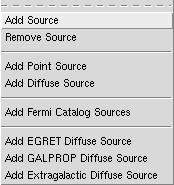

In [107]:
Image(filename='images/modeleditor_source_menu.png')

There are numerous ways to generate initial seed positions for sources in your model. The simplest way is to use [ds9](http://ds9.si.edu/site/Download.html) to look at the image and find potential excesses. 

You can play with the scaling and smoothing to find sources. Mousing over them gives you a rough idea of where the source is located. 

In [108]:
%system ds9 data/3C279_cmap.fits

[]

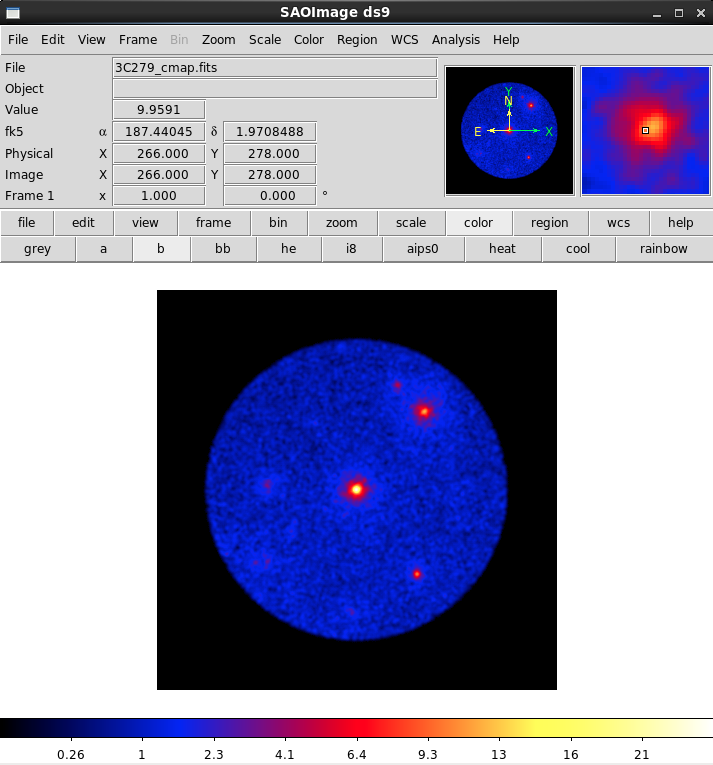

In [109]:
Image(filename='images/ds9_3c279_cmap.png')

Excesses:
* 3C_279: 193.98, -5.82
* 3C_273: 187.24, 2.07
* Source_1: 187.8, -14.19
* Source_2: 189.9, 4.66
* Source_3: 203.1, -5.3

Of course, there are many better ways to do this. But this works as a first cut. After completing an initial likelihood fit, you can to refine these positions with the *[gtfindsrc](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtfindsrc.txt)* tool, iterate, and then refit with the better positions.

We can enter these into the ModelEditor, and then add the Galactic and isotropic diffuse models. Remember that the names of the two diffuse components should match the information in the diffuse response columns.

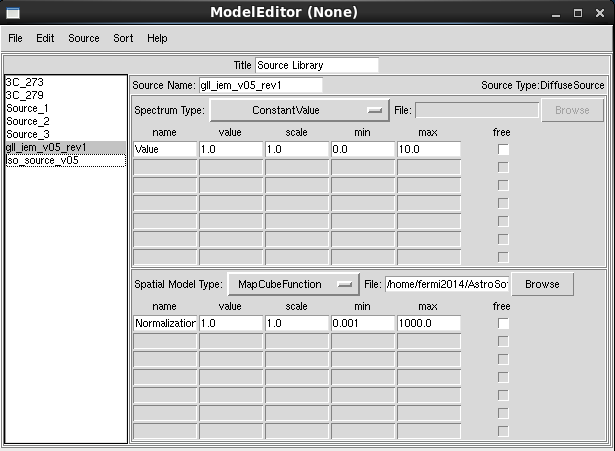

In [110]:
Image(filename='images/modeleditor_2.png')

The sort menu provides options if you wish to sort, which is especially useful if your model has many sources.

Once you are done, save the file as *filename.xml* in the directory where you are analyzing your data.

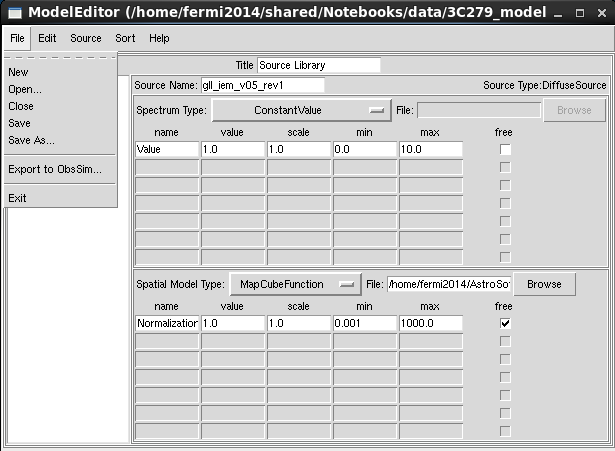

In [117]:
Image(filename='images/modeleditor_3.png')

In [62]:
%system cat 3C279_model_me.xml

['<?xml version="1.0" ?>',
 '<source_library title="Source Library" xmlns="http://fermi.gsfc.nasa.gov/source_library">',
 '  <source name="Source_3" type="PointSource">',
 '    <spectrum type="PowerLaw">',
 '      <parameter free="true" max="1000.0" min="0.001" name="Prefactor" scale="1e-09" value="1.0"/>',
 '      <parameter free="true" max="-1.0" min="-5.0" name="Index" scale="1.0" value="-2.1"/>',
 '      <parameter free="false" max="2000.0" min="30.0" name="Scale" scale="1.0" value="100.0"/>',
 '    </spectrum>',
 '    <spatialModel type="SkyDirFunction">',
 '      <parameter free="false" max="360.0" min="0.0" name="RA" scale="1.0" value="203.1"/>',
 '      <parameter free="false" max="90.0" min="-90.0" name="DEC" scale="1.0" value="-5.3"/>',
 '    </spatialModel>',
 '  </source>',
 '  <source name="Source_1" type="PointSource">',
 '    <spectrum type="PowerLaw">',
 '      <parameter free="true" max="1000.0" min="0.001" name="Prefactor" scale="1e-09" value="1.0"/>',
 '      <parame

**Questions to ask yourself when building your model**

1) What is the proper spectral model to use?

It's wisest to use the simplest model that well-represents the data. Don't use a Broken Power-Law (BPL), when a simple Power Law (PL) will work. Likewise, don't use a Power-Law with Exponential Cutoff (PLEC) when a Log-Parabloa (LP) fits the data just as well. Adding degrees of freedom to your model will reduce your detection significance.

2) Which parameters should be left free?

A good rule of thumb is to leave free all parameters that affect spectral shape for sources near the source of interest. (And for that one too, of course!) How "near" is "near"? That's your call...but 5 degrees is not unreasonable.

3) How much freedom should the diffuse sources have?

In most cases, you will leave only the normalization parameter free for the all-sky diffuse components. Fitting the spectral shape of these components required a dedicated all-sky analysis. However, in some cases you may find you want to freeze the normalization for one or both diffuse components.

Another option - Python Script
-------------

One of the user-contributed tools available on the FSSC website is *[make3FGLxml.py](http://fermi.gsfc.nasa.gov/ssc/data/analysis/user/readme_make3FGLxml.txt)*, a python script that uses the 3FGL catalog file to generate an initial XML file that can be tweaked to your purpose. 

**Remember** 

* 3FGL catalog used only 4 years of LAT data
* Covered the energy range from 100 MeV to 100 GeV
* Analyses outside those time and energy ranges ***will require*** modifications to the model.

Download the script from the [User Contributed Tools](http://fermi.gsfc.nasa.gov/ssc/data/analysis/user/) page, put it in the following directory, and make it executable:
/home/fermi2014/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/bin

You will need access to the 3FGL catalog. **On your USB key**

*or you can download the [LAT 4-year Point Source Catalog](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/) (gll_psc_v16.fit) and place it in the refdata directory*

The inputs for the script are as follows:

* Catalog file - The gll_psc_v16.fits file you just downloaded. 
* LAT events file - The script uses the position information from the header to determine which sources should be included in your model.
* Galactic diffuse model - You need the full path: 
    * /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/fermi/galdiffuse/gll_iem_v05_rev1.fit
* Appropriate isotropic diffuse model - Again, you will need the full path: 
    * /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/fermi/galdiffuse/iso_source_v05_rev1.txt
* The diffuse designators from the event file

There are also optional parameters:

* radLim - number fo degrees from the center of the ROI beyond which all parameters are fixed. By default this equals the ROI from your data file.
* signif - Lower value for the source significance under which less significant sources will be frozen to their catalog parameter values. Excellent when making models for light curves that will use short-duration data sets.
* extDir - full path to the directory containing the extended source template files: 
    * /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/Extended_archive_v15/Templates
* psForce - Set to 'True' to force all extended sources in the catalog to be modeled instead as point sources. Useful if source extension is not significant (for short duration data sets) or to help speed up the likelihood fit. (The latter is not advised for publication-quality results.)


In [70]:
%system make3FGLxml.py -h

['This is make3FGLxml version 01.',
 'usage: make3FGLxml.py [-h] [-o OUTPUTXML] [-G GALFILE] [-g GALNAME]',
 '                      [-I ISOFILE] [-i ISONAME]',
 '                      [-N [{True,False,T,F,t,f,TRUE,FALSE,true,false,1,0}]]',
 '                      [-e EXTDIR] [-r RADLIM] [-R MAXRAD] [-ER EXTRARAD]',
 '                      [-s SIGFREE]',
 '                      [-v {True,False,T,F,t,f,TRUE,FALSE,true,false,1,0}]',
 '                      [-p [{True,False,T,F,t,f,TRUE,FALSE,true,false,1,0}]]',
 '                      [-m {True,False,T,F,t,f,TRUE,FALSE,true,false,1,0}]',
 '                      [-GIF [{True,False,T,F,t,f,TRUE,FALSE,true,false,1,0}]]',
 '                      catalog ev',
 '',
 'Creates an xml model from the 3FGL catalog (FITS or xml version) for a',
 'specific ROI, coordinates of the ROI center are taken from an input event',
 'file, the radius for including sources is 10 degrees beyond the extraction',
 'radius used in the event file, sources with free p

Now we're ready to build the source model...

In [81]:
%system make3FGLxml.py /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/gll_psc_v16.fit \
/home/fermiuser/shared/Likelihood_data/3C279_mktime.fits \
--outputxml /home/fermiuser/shared/Likelihood_data/3C279_model_py.xml \
--galfile /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/fermi/galdiffuse/gll_iem_v05_rev1.fit \
--galname gll_iem_v05_rev1 \
--isofile /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/fermi/galdiffuse/iso_source_v05_rev1.txt \
--isoname iso_source_v05 \
--extDir /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/Extended_archive_v15/Templates \
--radLim 10 --sigFree 7 -m FALSE

['This is make3FGLxml version 01.',
 'Creating file and adding sources from 3FGL',
 'Extended source CenA Lobes in ROI, make sure /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/Extended_archive_v15/Templates/CenALobes.fits is the correct path to the extended template.',
 'Added 311 point sources and 1 extended sources',
 'If using unbinned likelihood you will need to rerun gtdiffrsp for the extended sources or rerun the makeModel function with optional argument psForce=True']

In [82]:
%system head -n 50 /home/fermiuser/shared/Likelihood_data/3C279_model_py.xml

['<?xml version="1.0" ?>',
 '<source_library title="source library">',
 '',
 '<!-- Point Sources -->',
 '',
 '<!-- Sources between [0.0,8.0) degrees of ROI center -->',
 '<source ROI_Center_Distance="7.349" name="3FGL J1228.4-0317" type="PointSource">',
 '\t<spectrum type="PowerLaw">',
 '\t<!-- Source is 7.34896447063 degrees away from ROI center -->',
 '\t<!-- Source signficance 5.7 is less than specified minimum for a free source of 7.0 -->',
 '\t\t<parameter free="0" max="1e4" min="1e-4" name="Prefactor" scale="1e-13" value="2.12171277184"/>',
 '\t\t<parameter free="0" max="10.0" min="0.0" name="Index" scale="-1.0" value="2.27196"/>',
 '\t\t<parameter free="0" max="5e5" min="30" name="Scale" scale="1.0" value="1458.882446"/>',
 '\t</spectrum>',
 '\t<spatialModel type="SkyDirFunction">',
 '\t\t<parameter free="0" max="360.0" min="-360.0" name="RA" scale="1.0" value="187.111"/>',
 '\t\t<parameter free="0" max="90" min="-90" name="DEC" scale="1.0" value="-3.2954"/>',
 '\t</spatialModel

There are some important things to notice here:
----------

* The script added 311 sources, compared to the 4 sources we used previously in this analysis and the 7 sources we could identify by eye in the counts map.
    * Fixing parameters for faint sources provides a performance boost, especially when using less time than was used in the catalog analysis.
* There is one extended source, so we will need to run *[gtdiffrsp](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtdiffrsp.txt)* prior to performing an **unbinned likelihood** analysis. 
    * Remember, **binned likelihood** does not use the diffuse response.
* The script has added the sources in 4-degree concentric rings of increasing distance from the center of the ROI. 
* The script has provided the radial separation for each source from the center of the ROI. Only sources inside 7 degrees have their parameters left free.
* The source names provided by the script are the 3FGL catalog names.
* The initial values used in the model are the fitted values from the 3FGL catalog.
* The Galactic and isotropic diffuse models are included at the end of the file
    * The source names are the designators we provided when we called the script
* There is no mechanism for adding the Earth limb template
    * It must be added manually if desired.

Handling Energy Dispersion
---------

For Pass 8 analyses of energies below ~200 MeV, energy dispersion is significant.

* Enable the use of the energy dispersion correction
    * Only possible when performing a Binned Likelihood analysis 
    * Only possible when using python
    
PyLikelihood commands for manipulating the energy dispersion correction:

* Turn on energy dispersion handling - like.logLike.set_edisp_flag(True)
* Check if edisp handling is turned on - print like.logLike.use_edisp()
* Turn off energy dispersion handling - like.logLike.set_edisp_flag(False)


Once enabled, energy dispersion correction is enabled for **all** the components in the XML model. 

Should not be enabled for components that have already been corrected for energy dispersion, or components that were derived from a fit to the data without energy dispersion correction. This includes:

* Galactic diffuse model
* Isotropic templates
* Earth limb template

To turn off energy dispersion for a specific source, include *apply_edisp="false"* in the < spectrum > attribute for that source in your XML model.

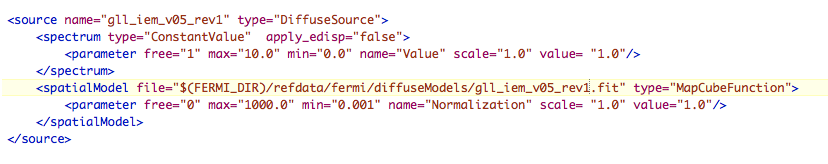

In [84]:
Image(filename='images/edisp_off_xml.png')

Other uses for your XML model
====================

XML models are used as inputs for more than just the likelihood analysis. They can also be used to test for unmodeled sources, to create a test statistic map of the fitted sources, to perform a source localization, to assign probabilities to detected events, and to generate simulated data sets.

Testing for unmodeled sources
----------------

Once a likelihood fit has completed, you may wish to test for other sources in your ROI that were not included in your model. To do this, you should freeze all parameters in your model **except for the normalization/prefactor for the diffuse components** and then run the *[gttsmap](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gttsmap.txt)* tool. This tests for excesses in the data above what has been modeled. You leave the diffuse normalizations free because in the initial fit, the flux from an unmodeled point source often gets fitted into the diffuse component.

*[gttsmap](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gttsmap.txt)* creates a grid of pixels and then performs one likelihood fit per pixel, making the assumption that there is an unmodeled point source (power-law spectrum) at the position of each pixel. The result is an image showing the positions where pointlike excesses are present. By examining the output, you can determine if any significant, and then add them to your model for a refit of the data.

Making Test Statistic Maps
----------------

It is often useful to look at how your source of interest looks in test statistic space. This can reveal evidence for non-pointlike morphologies, or issues with nearby structure in the Galactic diffuse model. 

To do this, you first remove the source of interest from the model completely. Then freeze all parameters of the remaining sources, including the diffuse components. Then run the *[gttsmap](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gttsmap.txt)* tool to create a map showing the profile of the source you omitted from the model in test statistic (significance) space.

***Warning!!*** Running *gttsmap* is very time intensive, as it performs a likelihood fit at each pixel. In the following images, I generated TS maps for six months of data in a 20x20 degree region with 0.25 degree pixels. The source model contained only four sources (3C279, 3C273 and 2 diffuse sources). The run time to perform the 6400 likelihood fits for each map was about four days. 

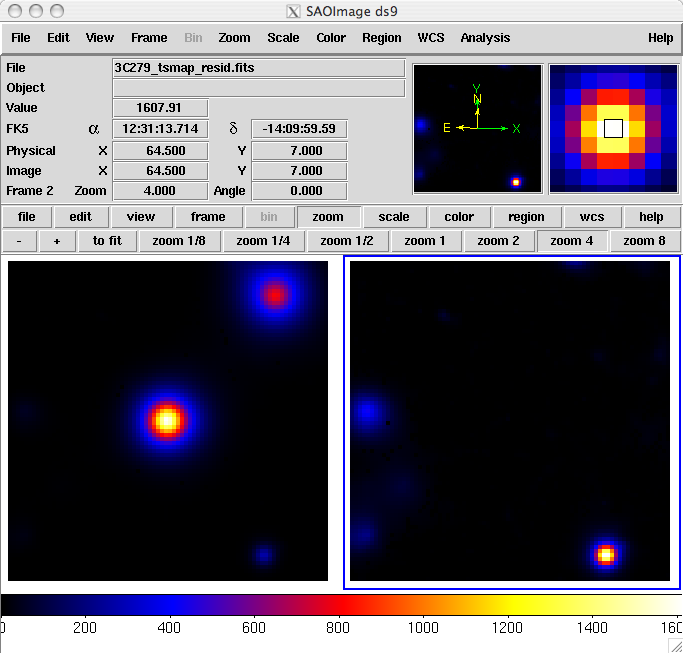

In [83]:
Image(filename='images/3C279_tsmap_tiled.png')

Perform a source localization
----------------

Recall that it is not recommended to perform a position fit while also fitting all the other parameters in a likelihood analysis. Instead, the *[gtfindsrc](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtfindsrc.txt)* tool is used to determine the position of a gamma-ray excess. A model (including the source of interest) that has been properly maximized and has converged is used as the input to the source finding algorithm. 

The process is very similar to what is done by *gttsmap* above, but with an additional analytic component. Essentially, the tool analyzes the likelihood surface ad determines the position at which the source has the highest test statistic. It then uses the shape of that likelihood surface to determine the 68% confidence radius. Both position and error radius are reported by the tool once the analysis is complete. As with *gttsmap*, this is a time and processor-intensive analysis.

Assigning Probabilities to Events
------------------------

The maximum likelihood process essentially is a sorting process. The software compares the model provided to the measured properties of each event, and decides which source that event is most likely to have generated that event. 

In fact, the process is even more subtle than that. It divides each event into the various sources according to the fractional probability that the source was the source of the event. As a result, a single event can contribute to the Npred for multiple sources...as long as the total is one full event.

The *[gtsrcprob](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtsrcprob.txt)* tool gives you access to the probability matrix that likelihood uses to to determine how to divide up the contribution of each event. This can then be used to refine and/or weight your data set to favor events that are more likely to have originated from your source of interest.

Generating Simulated Data Sets
----------------

The *[gtobssim](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtobssim.txt)* tool uses observatory pointing information plus a source model and the instrument responses to generate simulated instrument data that can be used for any number of purposes. However, the format used by this tool is different than that used by the likelihood analysis tools. 

The easiest way to convery an XML model file in likelihood format to that accepted by *gtobssim*, is to open the file in the *ModelEditor* tool and then export the model to the ObsSim format from there.

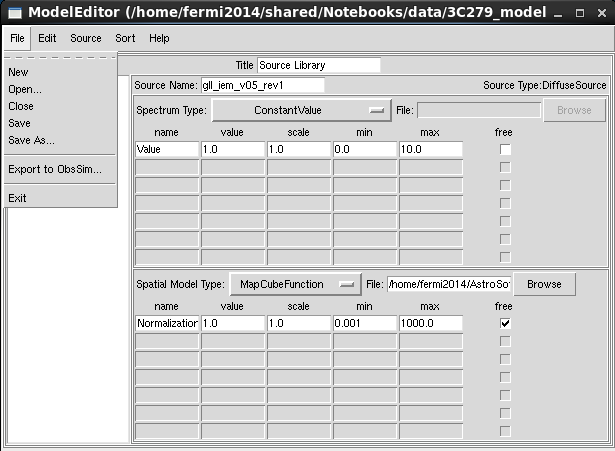

In [85]:
Image(filename='images/modeleditor_3.png')

Energy dispersion in simulations
-----------

For Pass 8, *[gtobssim](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtobssim.txt)* will enable the simulation of energy dispersion by default. 

In order to turn off that simulation for a specific source, add the *apply_edisp="false"* option to the < spectrum > attribute for that source in your *[gtobssim](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtobssim.txt)* XML model.

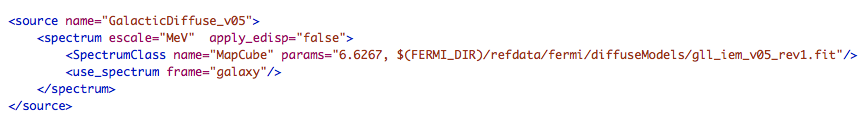

In [87]:
Image(filename='images/edisp_off_obssim_xml.png')